In [44]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from pathlib import Path

from pipeline.features import get_merged_df, merge_segment_dfs
from pipeline import models, validation
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [72]:
base_path = Path('/Users/zubrikhina/Documents/datasets/depr_evm/preproc_data/depr_2/features_epoch_1/')

In [73]:
feature_methods = [
    'coh_alpha',
    'coh-beta',
    'coh-theta',
    'env-alpha',
    'env-beta',
    'bands',
    'env-theta',
    'env',
    'coh',
    "asMap"
]


In [74]:
def plot_hist(scores, bins=None):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    accs = np.array([score.acc for score in scores])
    roc_aucs = np.array([score.roc_auc for score in scores])
    axes[0].set_title('accuracy')
    axes[1].set_title('roc-auc')
    for ax, values in zip(axes, (accs, roc_aucs)):
        _, bin_ticks, _ = ax.hist(values, bins=bins)
        ax.set_xticks(bin_ticks)
        ax.grid()
        ax.legend([f"mean={values.mean():4f}, std={values.std():4f}"], loc='lower center')


In [75]:
def calculate_cross_val_score(feature_method):
    model = models.LRScaled()
    l_encoder =LabelEncoder()
    dir_60 = '60s_1_0_60'
    df_60 = get_merged_df(f"{base_path}", feature_method)
    df_60['target'] =l_encoder.fit_transform(df_60['target'])
    features = list(df_60.columns.difference(['fn', 'target']))
    method = validation.NestedCrossValidator(df_60, features, model, random_state=57, p_bar=1,n_splits=5, n_repeats=1,metric='roc-auc')
    score = method.get_prediction_result()
    score.draw_confusion_matrix(method.model)
    return score

In [76]:
result_data_dict =defaultdict(list)

  0%|          | 0/5 [00:00<?, ?it/s]

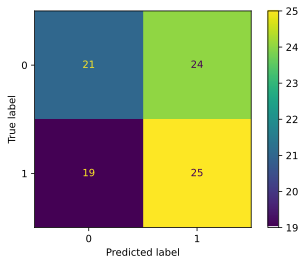

SCORE coh_alpha:  0.6015151515151514


  0%|          | 0/5 [00:00<?, ?it/s]

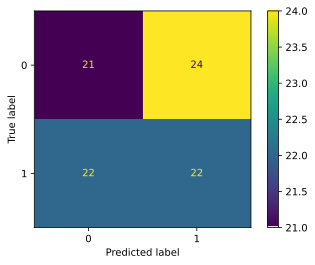

SCORE coh-beta:  0.48282828282828283


  0%|          | 0/5 [00:00<?, ?it/s]

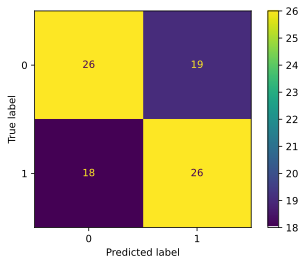

SCORE coh-theta:  0.6075757575757577


  0%|          | 0/5 [00:00<?, ?it/s]

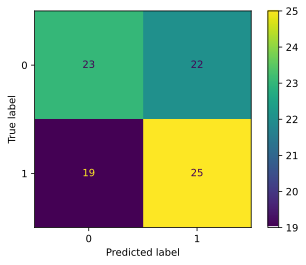

SCORE env-alpha:  0.5333333333333334


  0%|          | 0/5 [00:00<?, ?it/s]

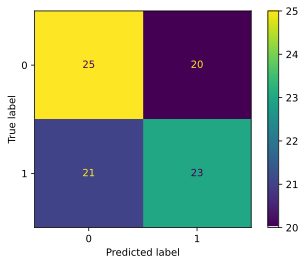

SCORE env-beta:  0.5323232323232323


  0%|          | 0/5 [00:00<?, ?it/s]

Found array with 0 feature(s) (shape=(71, 0)) while a minimum of 1 is required by StandardScaler.


  0%|          | 0/5 [00:00<?, ?it/s]

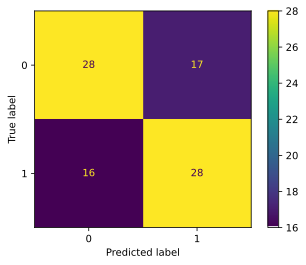

SCORE env-theta:  0.6328282828282829


  0%|          | 0/5 [00:00<?, ?it/s]

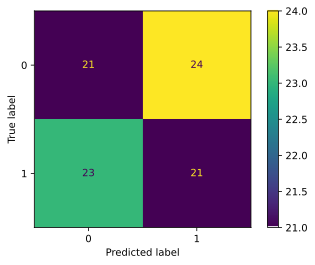

SCORE env:  0.49646464646464644


  0%|          | 0/5 [00:00<?, ?it/s]

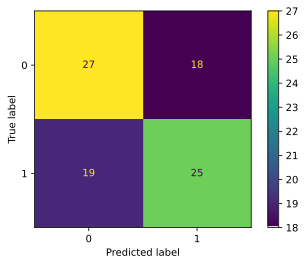

SCORE coh:  0.5707070707070707


  0%|          | 0/5 [00:00<?, ?it/s]

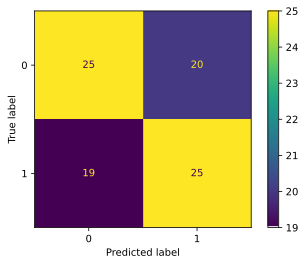

SCORE asMap:  0.5555555555555555


  0%|          | 0/5 [00:00<?, ?it/s]

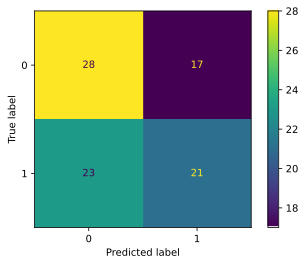

SCORE: 0.5247474747474747
_____________________________-


In [77]:
for feature_method in feature_methods:
        try:
            score = calculate_cross_val_score([feature_method])
            print(f"SCORE {feature_method}: ", score.roc_auc)
            result_data_dict[feature_method].append(score.roc_auc)
        except Exception as e:
            print(e)
            result_data_dict[feature_method].append(None)
score = calculate_cross_val_score(feature_methods)
result_data_dict["all_features"].append(score.roc_auc)
print("SCORE:" , score.roc_auc)
print("_____________________________-")
df_res =pd.DataFrame.from_records(result_data_dict)
df_res.to_csv('eeg-evm-roc-auc.csv', index=False)

# Вложенная кросс-валидация

In [67]:
dir_60 = '60s_1_0_60'
df_60 = get_merged_df(base_path, feature_methods)
features = list(df_60.columns.difference(['fn', 'target']))
df_60

,env_nofilt_C3_C4,env_nofilt_C3_Cz,env_nofilt_C3_F3,env_nofilt_C3_F4,env_nofilt_C3_F7,env_nofilt_C3_F8,env_nofilt_C3_Fp1,env_nofilt_C3_Fp2,env_nofilt_C3_Fz,env_nofilt_C3_O1,...,env_nofilt_O1_P4,env_nofilt_O1_Pz,env_nofilt_O2_P3,env_nofilt_O2_P4,env_nofilt_O2_Pz,env_nofilt_P3_P4,env_nofilt_P3_Pz,env_nofilt_P4_Pz,fn,target
0,0.493717,0.811100,0.715520,0.520387,0.511831,0.475442,0.430777,0.403714,0.564109,0.315842,...,0.428410,0.330137,0.336174,0.724114,0.422019,0.441393,0.547741,0.668409,Health/F140.csv,0
1,0.541027,0.822715,0.711290,0.642128,0.594330,0.603223,0.613710,0.553433,0.625298,0.202440,...,0.545551,0.472245,0.509169,0.745019,0.647625,0.628540,0.694936,0.813017,Health/M163.csv,0
2,0.683440,0.879267,0.793472,0.655584,0.574715,0.610894,0.559252,0.539025,0.669562,0.383419,...,0.313477,0.320796,0.285961,0.539466,0.495299,0.425671,0.585140,0.626546,Health/M165.csv,0
3,0.602974,0.686569,0.642736,0.718334,0.769361,0.789033,0.590058,0.462102,0.769592,0.461050,...,0.551056,0.500349,0.637059,0.774533,0.547744,0.824526,0.733813,0.802817,Health/F123.csv,0
4,0.515864,0.685167,0.586314,0.394134,0.398099,0.106366,0.152029,0.203323,0.452797,0.229857,...,0.468417,0.405195,0.515737,0.750436,0.517777,0.612058,0.684039,0.716677,Health/F137.csv,0
5,0.468379,0.610688,0.496801,0.492975,0.613538,0.564441,0.342398,0.264870,0.592435,0.269462,...,0.493059,0.388227,0.579152,0.813702,0.514565,0.699643,0.729319,0.704014,Health/F136.csv,0
6,0.481916,0.684387,0.585234,0.617256,0.815946,0.716406,0.571364,0.470291,0.732568,0.230457,...,0.333238,0.382256,0.636444,0.785833,0.627500,0.760688,0.740102,0.831907,Health/F122.csv,0
7,0.459456,0.612417,0.597307,0.574614,0.538004,0.650518,0.472313,0.388473,0.690954,0.215930,...,0.490326,0.634213,0.641680,0.821403,0.712319,0.764384,0.718870,0.794098,Health/F134.csv,0
8,0.537240,0.730413,0.628014,0.645002,0.795178,0.721937,0.599298,0.523458,0.741800,0.373235,...,0.322138,0.386735,0.661413,0.847364,0.698061,0.745818,0.718236,0.844057,Health/F120.csv,0
9,0.642684,0.785610,0.595566,0.505107,0.663712,0.631915,0.453297,0.305503,0.639454,0.165227,...,0.516444,0.208099,0.486450,0.733737,0.308588,0.678241,0.624323,0.587978,Health/F121.csv,0


In [68]:
method = validation.NestedCrossValidator(df_60, features, model, random_state=57, p_bar=1)

In [69]:
score = method.get_prediction_result()

  0%|          | 0/10 [00:00<?, ?it/s]

In [70]:
score.roc_auc

0.7544444444444445

# Проверка признаков на отложенной выборке

In [29]:
method = validation.TrainTestValidator(df_60, features, model)

In [30]:
scores = validation.get_repeated_scores(method, n_repeats=50, random_state=57)

  0%|          | 0/50 [00:00<?, ?it/s]

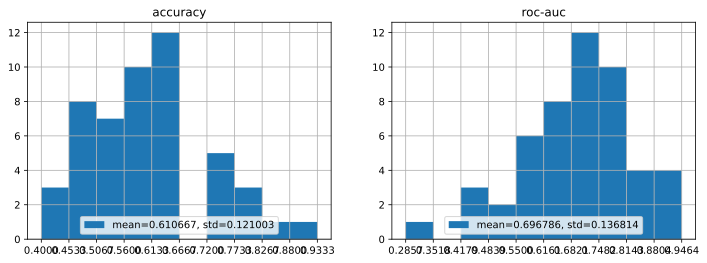

In [31]:
plot_hist(scores)

In [ ]:
scores = validation.get_repeated_scores(method, n_repeats=1000, random_state=57, p_bar=1)

In [ ]:
plot_hist(scores)

## Проверка качества на разных временных промежутках

In [31]:
dir_10 = '10s_1_0_10'
dir_20 = '20s_1_20_40'
dir_30 = '30s_0_30_60'
df_10 = get_merged_df(base_path/dir_10, feature_methods)
df_20 = get_merged_df(base_path/dir_20, feature_methods)
df_30 = get_merged_df(base_path/dir_30, feature_methods)

In [32]:
val_10 = validation.TrainTestValidator(df_10, features, model)
val_20 = validation.TrainTestValidator(df_20, features, model)
val_30 = validation.TrainTestValidator(df_30, features, model)

In [33]:
scores_10 = validation.get_repeated_scores(val_10, random_state=57, n_repeats=100, p_bar=1)
scores_20 = validation.get_repeated_scores(val_20, random_state=58, n_repeats=100, p_bar=1)
scores_30 = validation.get_repeated_scores(val_30, random_state=59, n_repeats=100, p_bar=1)

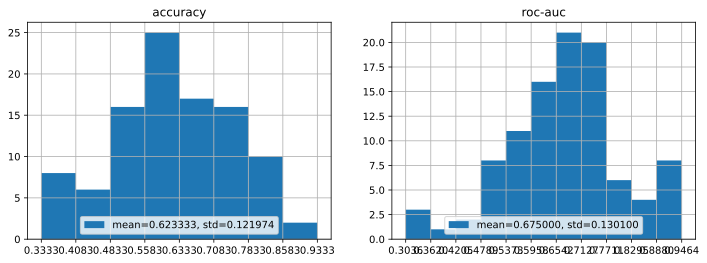

In [34]:
plot_hist(scores_10, bins='auto')

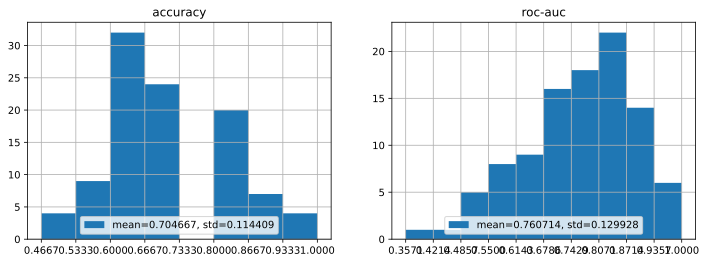

In [35]:
plot_hist(scores_20, bins='auto')

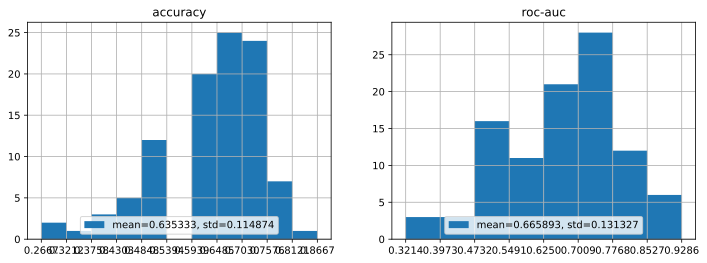

In [36]:
plot_hist(scores_30, bins='auto')

# Расширение выборки данными с разных сегментов

Наилучший результат достигается при использовании более длинных промежутков.

## Сегменты по 10 секунд

In [37]:
dirs = ('10s_1_0_10', '10s_1_10_20', '10s_1_20_30', '10s_1_30_40', '10s_1_40_50', '10s_1_50_60')
dfs = [get_merged_df(base_path/dir, feature_methods) for dir in dirs]
df_combined = merge_segment_dfs(dfs)
df_combined

,env_alpha_t6_t4,env_alpha_t6_o1,env_alpha_t6_f8,env_alpha_t6_p4,env_alpha_t6_c4,env_alpha_t6_t3,env_alpha_t6_f7,env_alpha_t6_f3,env_alpha_t6_o2,env_alpha_t6_f4,...,bands_gamma_fp2,bands_alpha_pz,bands_beta_pz,bands_theta_pz,bands_gamma_pz,bands_alpha_fz,bands_beta_fz,bands_theta_fz,bands_gamma_fz,segment_id
0,0.914285,0.695979,0.724699,0.890229,0.551959,0.670720,0.611987,0.535454,0.764269,0.498697,...,251.486923,133.922427,112.963701,20.737254,25.441610,32.561270,61.582367,40.861963,21.764552,0
1,0.586656,0.563749,0.261684,0.823794,0.346171,-0.013657,-0.110797,0.179467,0.848123,0.095687,...,37.909243,723.331197,1016.607728,70.421929,19.077140,24.123943,69.312584,32.058691,7.771738,0
2,0.457119,0.456332,0.441248,0.722768,0.389885,0.233648,0.135644,-0.053469,0.561689,0.368402,...,60.237380,70.063345,22706.960920,71.822150,20.492636,21.316349,54.745767,86.837347,15.404566,0
3,0.582743,0.704017,-0.065206,0.969298,-0.125681,0.080891,0.093202,0.235169,0.887544,0.110030,...,114.734900,1290.664552,10159.584699,1032.345907,46.425218,368.043076,88.511667,47.185276,42.632577,0
4,0.370072,0.331238,0.150465,0.647416,0.222495,-0.058686,0.078606,0.154638,0.569723,0.233763,...,30.731451,47.920225,5447.790909,13.471301,7.778474,622.034332,2575.071792,71.042945,15.754958,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.312314,0.487702,0.336305,0.851390,0.221079,0.120738,0.079060,-0.051852,0.693881,0.041423,...,78.765954,53.776881,145.567260,59.104417,34.647162,41.839973,135.205323,57.478750,39.792874,5
530,0.237181,0.604889,-0.056222,0.796394,0.009880,0.162277,0.165035,0.054907,0.815130,-0.022121,...,317.057262,52.300108,374.989796,4.815677,20.698512,32.543488,141.724230,12.574732,28.478222,5
531,0.142793,0.633893,0.086678,0.846117,0.620504,0.400371,0.156858,0.144730,0.817416,0.058072,...,38.580552,115.638305,137.027824,36.492265,7.572335,67.398890,46.971191,39.557153,13.050555,5
532,0.878237,0.392614,0.451882,0.903655,0.649734,0.307619,0.160375,0.006918,0.857550,-0.015248,...,43.197215,582.728403,456.280198,260.092579,9.620329,334.805341,547.120642,223.483072,18.052830,5


In [38]:
val_10_combined = validation.MultiSegementTraiTest(df_combined, features, model)

In [39]:
scores = validation.get_repeated_scores(val_10_combined, random_state=57, n_repeats=100, p_bar=1)

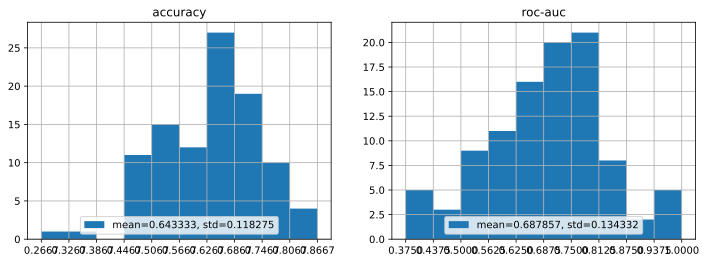

In [40]:
plot_hist(scores)

## Сегменты по 20 секунд

In [41]:
dirs = ('20s_1_0_20', '20s_1_20_40', '20s_1_40_60')
dfs = [get_merged_df(base_path/dir, feature_methods) for dir in dirs]
df_combined = merge_segment_dfs(dfs)
df_combined

,env_alpha_t6_t4,env_alpha_t6_o1,env_alpha_t6_f8,env_alpha_t6_p4,env_alpha_t6_c4,env_alpha_t6_t3,env_alpha_t6_f7,env_alpha_t6_f3,env_alpha_t6_o2,env_alpha_t6_f4,...,bands_gamma_fp2,bands_alpha_pz,bands_beta_pz,bands_theta_pz,bands_gamma_pz,bands_alpha_fz,bands_beta_fz,bands_theta_fz,bands_gamma_fz,segment_id
0,0.903212,0.668728,0.712176,0.897785,0.649626,0.677085,0.622003,0.504900,0.813267,0.633535,...,216.472992,122.871938,120.667373,34.256358,30.320214,62.591809,80.102953,43.232044,23.353978,0
1,0.455296,0.657557,0.225202,0.762450,0.296469,0.081164,-0.058821,0.112804,0.836720,0.101374,...,39.974496,465.851508,1045.326646,61.569659,16.625218,20.474018,65.604699,33.818140,7.830952,0
2,0.664440,0.713398,0.317772,0.942866,0.486986,0.341628,0.301291,0.310080,0.895424,0.254037,...,43.430587,118.274440,20173.276035,63.086443,24.293716,26.275673,60.054318,70.261342,13.745484,0
3,0.516754,0.784223,-0.281923,0.966653,-0.277566,-0.017970,-0.214442,-0.064275,0.922058,-0.022477,...,94.779284,1378.504194,8182.549637,932.528923,42.828699,788.254969,109.130366,102.240952,35.426058,0
4,0.338863,0.238128,0.076255,0.609050,0.146275,-0.035710,-0.001626,0.039533,0.425670,0.059878,...,33.714367,57.037651,4184.774655,10.248663,6.064255,744.766390,2259.690669,87.405138,16.506437,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.353909,0.450373,0.284153,0.845154,0.192295,0.185421,0.185592,0.048412,0.352170,0.119940,...,56.846150,66.915658,110.791899,62.764702,27.586719,68.232528,125.529162,65.547071,29.699432,2
263,0.405750,0.443676,-0.052183,0.785898,0.205441,-0.002874,-0.071132,-0.051847,0.804471,0.011939,...,400.696032,57.041019,216.128536,11.770267,20.825571,38.327482,97.971055,11.547572,24.951028,2
264,0.046665,0.655266,-0.004629,0.840410,0.594159,0.379012,0.178795,0.128452,0.826832,-0.035163,...,37.286965,170.126277,133.385000,47.406128,7.894467,85.407367,54.675545,42.224198,17.357731,2
265,0.822209,0.477668,0.434700,0.891781,0.674885,0.368518,0.184517,0.057977,0.832794,0.051860,...,53.542744,708.798341,446.211338,234.148504,11.564911,273.306772,584.035251,177.031113,24.771321,2


In [42]:
val_combined = validation.MultiSegementTraiTest(df_combined, features, model)

In [43]:
scores = validation.get_repeated_scores(val_combined, random_state=57, n_repeats=100, p_bar=1)

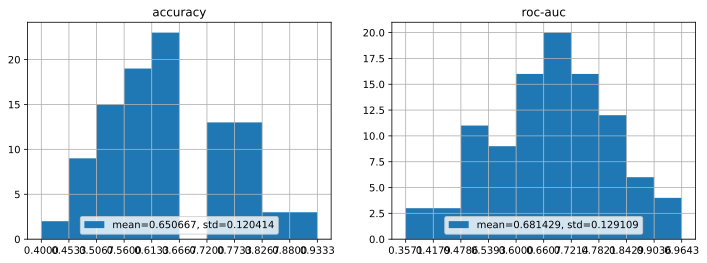

In [44]:
plot_hist(scores)

## Сегмент 60 секунд + сегменты по 30 секунд

In [45]:
dirs = ('60s_1_0_60', '30s_1_0_30', '30s_1_30_60')
dfs = [get_merged_df(base_path/dir, feature_methods) for dir in dirs]
df_combined = merge_segment_dfs(dfs)
df_combined

,env_alpha_t6_t4,env_alpha_t6_o1,env_alpha_t6_f8,env_alpha_t6_p4,env_alpha_t6_c4,env_alpha_t6_t3,env_alpha_t6_f7,env_alpha_t6_f3,env_alpha_t6_o2,env_alpha_t6_f4,...,bands_gamma_fp2,bands_alpha_pz,bands_beta_pz,bands_theta_pz,bands_gamma_pz,bands_alpha_fz,bands_beta_fz,bands_theta_fz,bands_gamma_fz,segment_id
0,0.917697,0.563511,0.733981,0.890499,0.632585,0.608995,0.587589,0.465903,0.805666,0.609705,...,223.139269,117.150068,164.755453,35.463277,28.187124,98.343289,108.277046,37.334738,28.722190,0
1,0.565322,0.691463,0.395560,0.838802,0.390735,0.262696,0.187657,0.332430,0.890252,0.320593,...,40.317846,1392.374420,1108.730184,158.650258,16.762985,84.285868,84.302854,46.954869,8.226627,0
2,0.629710,0.742584,0.337813,0.933791,0.425255,0.341252,0.330948,0.397619,0.893039,0.341289,...,37.244491,396.212235,16737.199176,92.482670,23.688684,62.222036,55.340857,66.968057,12.229815,0
3,0.392081,0.721059,-0.166488,0.952961,-0.179521,-0.013503,-0.138383,0.019072,0.899326,0.062211,...,61.902771,1402.297460,5319.573022,499.475399,39.080631,1370.389841,133.779096,157.880979,26.377877,0
4,0.516039,0.187451,0.147631,0.667217,0.212268,-0.072102,-0.042938,-0.026311,0.445761,0.034387,...,38.397270,44.429980,3056.271978,8.272703,4.270951,583.029084,1622.924687,59.905467,17.054516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.322791,0.454945,0.269073,0.838192,0.169618,0.198110,0.186271,0.050405,0.403630,0.075795,...,67.951691,72.362471,116.961489,62.921565,29.547401,58.361786,129.697972,64.945116,33.648098,2
263,0.465183,0.539167,0.086852,0.808753,0.250496,-0.040616,0.037373,0.076914,0.826408,0.063804,...,414.614072,66.609894,266.311316,12.838684,20.264966,54.028860,98.795621,12.471480,24.462345,2
264,0.153454,0.567152,0.058962,0.852240,0.626361,0.289296,0.119316,0.198035,0.824322,-0.022799,...,39.624121,144.453318,133.613429,47.433091,8.561120,72.903758,52.527177,41.581087,17.720611,2
265,0.802197,0.477024,0.427337,0.868348,0.620268,0.407511,0.228470,0.049710,0.798411,0.068738,...,52.054909,685.477156,440.041881,314.731151,11.598080,333.589377,636.297019,245.954735,24.344088,2


In [46]:
val_combined = validation.MultiSegementTraiTest(df_combined, features, model)

In [47]:
scores = validation.get_repeated_scores(val_combined, random_state=57, n_repeats=100, p_bar=1)

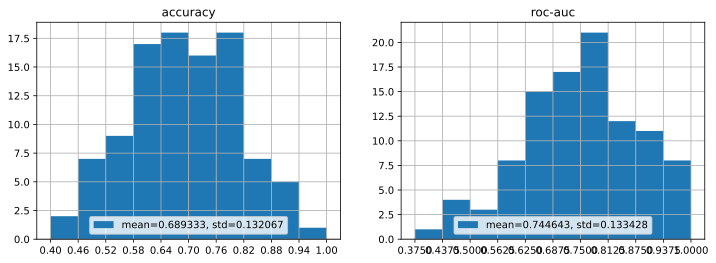

In [14]:
plot_hist(scores)

## Изменение размера тестовой выборки

In [48]:
val = validation.TrainTestValidator(df_60, features, model, test_size=30)

In [49]:
scores = validation.get_repeated_scores(val, random_state=57, n_repeats=100, p_bar=1)

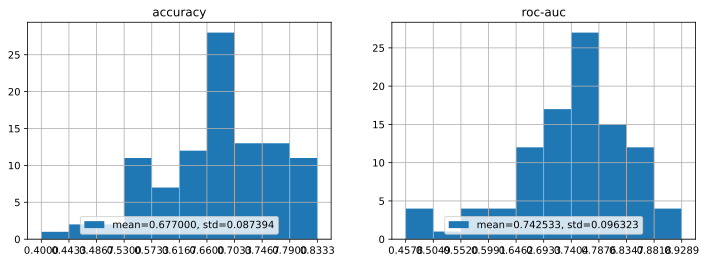

In [50]:
plot_hist(scores)

In [51]:
ms_val = validation.MultiSegementTraiTest(df_60, features, model, test_size=30)

In [52]:
scores = validation.get_repeated_scores(ms_val, random_state=57, n_repeats=100, p_bar=1)

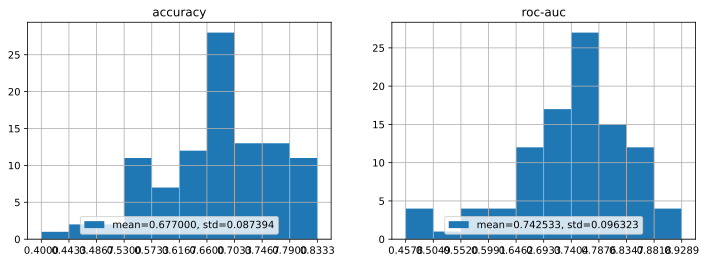

In [53]:
plot_hist(scores)

# Оптимизация accuracy при отборе признаков

Оптимизация accuracy не даёт прироста качества.

In [54]:
acc_val = validation.TrainTestValidator(df_60, features, model, metric='acc')

In [55]:
scores = validation.get_repeated_scores(acc_val, random_state=57, n_repeats=500, p_bar=1)

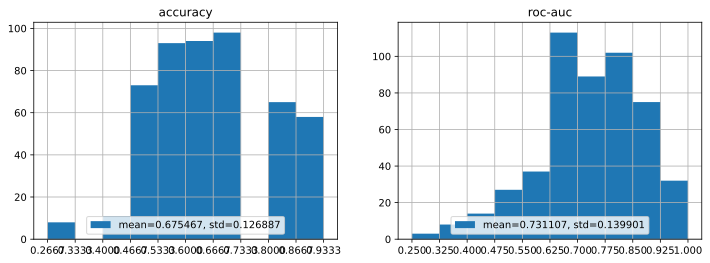

In [56]:
plot_hist(scores)